## 3D Plotting with Widgets

We can combine the ideas from the previous lessons to create interactive 3D plots, using widgets.


In [42]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
from ipywidgets import interact

(-1.4, 1.4)

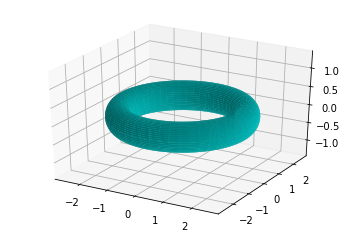

In [43]:
# First set up the figure, the axis, and the plot element we want to animate
fig = figure()
ax = axes(projection='3d')

# we need to fix some parameters, describing size of the inner radus of the torus/knot
r = .4

# We set the parameterization for the circle and the knot
u = linspace(0, 2*pi, 100)
v = linspace(0, 2*pi, 100)
u,v = meshgrid(u,v)
x_torus = 2*sin(u) + r*sin(u)*cos(v)
y_torus = 2*cos(u) + r*cos(u)*cos(v)
z_torus = r*sin(v)
x_knot =   sin(u) + 2*sin(2*u) + r*sin(u)*cos(v)
y_knot =   cos(u) - 2*cos(2*u) + r*cos(u)*cos(v)
z_knot = -sin(3*u) + r*sin(v)

ax.plot_surface(x_torus, y_torus, z_torus, color='c')
ax.set_xlim([-2*(1+r), 2*(1+r)])
ax.set_ylim([-2*(1+r), 2*(1+r)])
ax.set_zlim([-(1+r), (1+r)])

In [44]:
# animation function. This is called by the widget. Here we just use a float parameter 0<a<1.

def animate(a):
    fig = figure()
    ax = axes(projection='3d')
    ax.set_xlim([-2*(1+r), 2*(1+r)])
    ax.set_ylim([-2*(1+r), 2*(1+r)])
    ax.set_zlim([-(1+r), (1+r)])
    x = (1-a)*x_torus + a*x_knot
    y = (1-a)*y_torus + a*y_knot
    z = (1-a)*z_torus + a*z_knot
    ax.plot_surface(x, y, z, color='c')


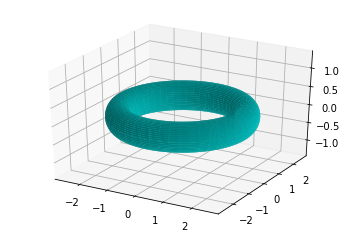

In [45]:
interact(animate,a=(0.0,1.0))

### Continuous updating

We can get better performance if we turn off the continuous updating on the Slider. We have to call the slider explicitly, though.

In [46]:
from ipywidgets import FloatSlider

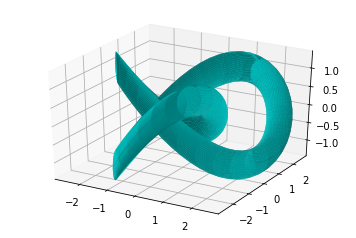

In [47]:
interact(animate,a=FloatSlider(min=0, max=1, step=.05, continuous_update=False))
